<a href="https://colab.research.google.com/github/Sushila-Phogat/CE888/blob/master/Bank_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df3=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/CE888/master/Assignment1/data/bank--full.txt')

df3.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# columwise sum of all na values
import numpy as np

df3.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
# columnwise sum of all nul values
import numpy as np

df3.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [0]:
#Replacing y in 1 in plcae of yes and 0 in place of 0
df3["y"].replace({"yes": 1, "no": 0}, inplace=True)


In [6]:
df3['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [0]:

#Deleting recurrence-events(1) class data to make imbalance data of 65%
df3=df3.sort_values(by='y', ascending=True)[30000:-1]

In [8]:
#After deleting data as
df3['y'].value_counts()


0    9922
1    5288
Name: y, dtype: int64

In [9]:
#Checking imbalance of data with help of Z-score

from statistics import *

clas_mean= df3['y'].mean()
clas_std = df3['y'].std()
df3['z-score'] = (df3['y']-clas_mean)/clas_std
values_plus_minus_one_z_score = len(df3[df3['z-score'].between(-1, 1)==True])
percent_values_plus_minus_one_z_score = values_plus_minus_one_z_score/len(df3)*100
percent_values_plus_minus_one_z_score

65.23339907955292

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


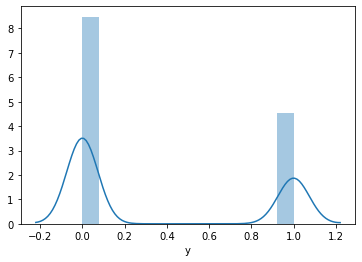

In [10]:
import seaborn as sns

sns.distplot(df3['y'])


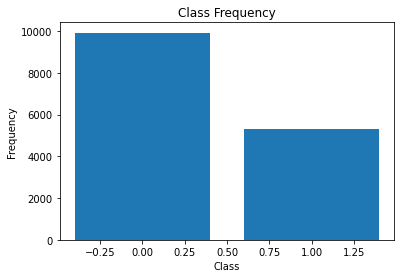

In [11]:
import numpy as np
import matplotlib.pyplot as plt

classes = df3['y'].values
unique, counts = np.unique(classes, return_counts=True)


plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

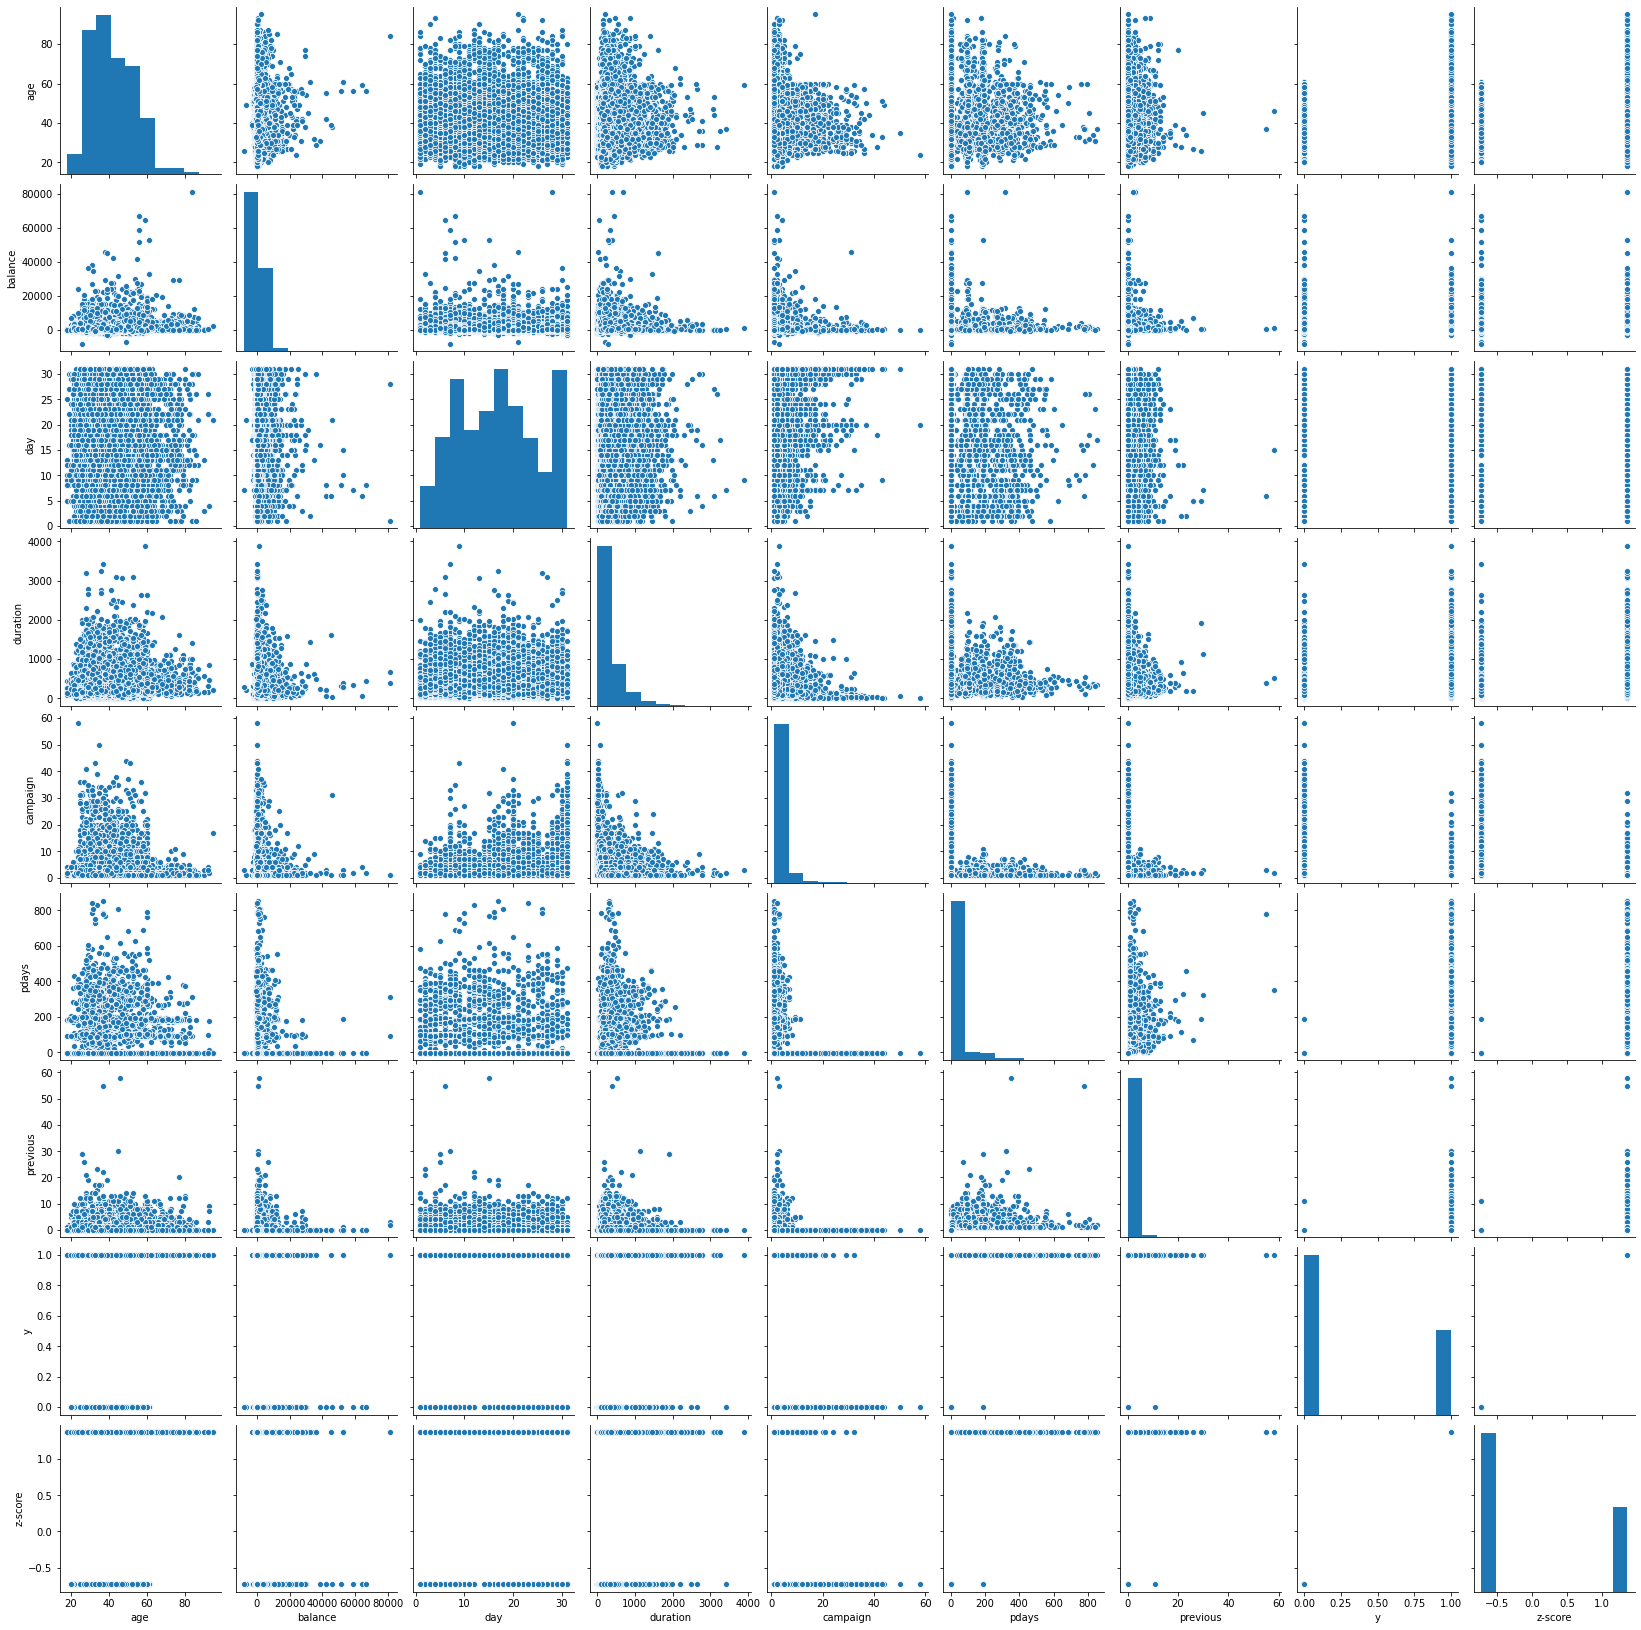

In [12]:
sns.pairplot(df3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef51677cf8>,
      dtype=object)

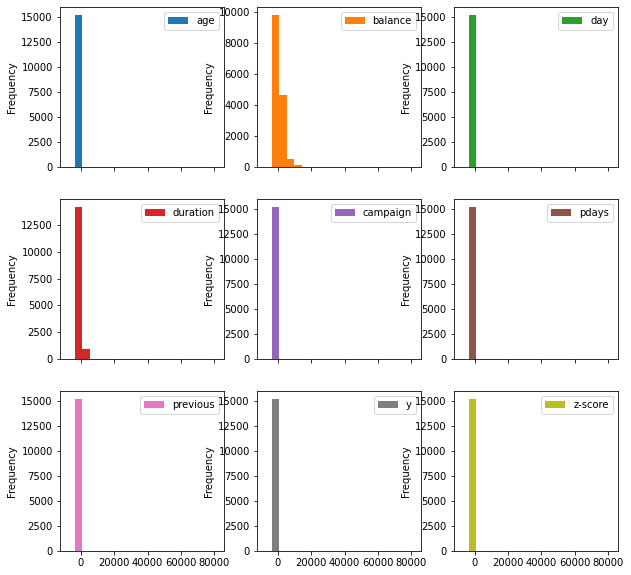

In [13]:
df3.plot.hist(subplots=True, layout=(3,3), figsize=(10, 10), bins=20)

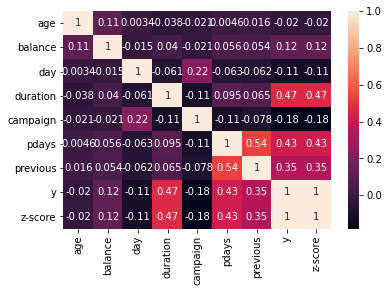

In [14]:
sns.heatmap(df3.corr(), annot=True)

In [15]:
df3.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'z-score'],
      dtype='object')

In [16]:
from sklearn.preprocessing import LabelEncoder
# convert a string variable to a categorical one
df3[["job"]] = df3[["job"]].apply(LabelEncoder().fit_transform)
df3[["marital"]] = df3[["marital"]].apply(LabelEncoder().fit_transform)
df3[["education"]] = df3[["education"]].apply(LabelEncoder().fit_transform)
df3[["default"]] = df3[["default"]].apply(LabelEncoder().fit_transform)
df3[["housing"]] = df3[["housing"]].apply(LabelEncoder().fit_transform)
df3[["contact"]] = df3[["contact"]].apply(LabelEncoder().fit_transform)
df3[["month"]] = df3[["month"]].apply(LabelEncoder().fit_transform)
df3[["loan"]] = df3[["loan"]].apply(LabelEncoder().fit_transform)

df3[["poutcome"]] = df3[["poutcome"]].apply(LabelEncoder().fit_transform)



df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,z-score
2913,47,1,1,0,0,502,1,0,2,14,8,28,2,-1,0,3,0,-0.730015
2914,41,0,1,1,0,3634,1,0,2,14,8,216,1,-1,0,3,0,-0.730015
2915,45,9,1,1,0,3395,1,0,2,14,8,215,1,-1,0,3,0,-0.730015
2916,33,0,2,1,0,673,1,0,2,14,8,199,2,-1,0,3,0,-0.730015
2909,42,4,2,1,0,2535,1,0,2,14,8,339,1,-1,0,3,0,-0.730015


In [17]:
X=df3.iloc[:,1:16]
y=df3.iloc[:,16:17]
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,z-score
2913,47,1,1,0,0,502,1,0,2,14,8,28,2,-1,0,3,0,-0.730015
2914,41,0,1,1,0,3634,1,0,2,14,8,216,1,-1,0,3,0,-0.730015
2915,45,9,1,1,0,3395,1,0,2,14,8,215,1,-1,0,3,0,-0.730015
2916,33,0,2,1,0,673,1,0,2,14,8,199,2,-1,0,3,0,-0.730015
2909,42,4,2,1,0,2535,1,0,2,14,8,339,1,-1,0,3,0,-0.730015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41107,36,7,2,2,0,1189,0,0,0,17,1,220,1,-1,0,3,1,1.369745
18516,44,9,1,0,0,755,0,1,0,31,5,829,4,-1,0,3,1,1.369745
35192,33,0,1,1,0,-370,1,0,0,7,8,261,1,345,1,0,1,1.369745
41104,77,5,1,2,0,0,0,0,0,17,1,286,1,-1,0,3,1,1.369745


In [18]:
print(X.shape)

(15210, 15)


-- 10-fold cross-validation 
0.9378688524590164


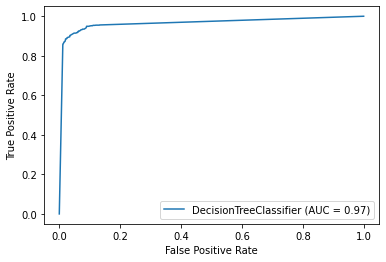

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve


# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("-- 10-fold cross-validation ")

#Defining Decision Tree
dt_clf = DecisionTreeClassifier(min_samples_split=20,
                                random_state=99)

#Training Decision Tree
dt_clf.fit(X_train, y_train)

#Cross Validating using Decision Tree
scores =cross_validate(dt_clf,  X_test, y_test.values.ravel(),
                     cv=10)


#Result
print(scores['test_score'].mean())

plot_roc_curve(dt_clf, X_test, y_test.values.ravel())
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


0.9401671699741156


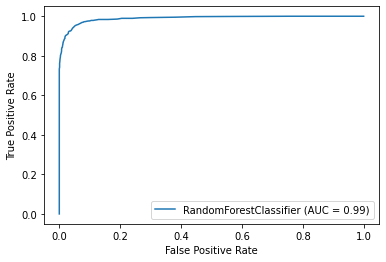

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve

#Defining Random Forest Classifier
rf_clf = RandomForestClassifier()

#Training Random Forest Classifier
rf_clf.fit(X_train, y_train)

#Cross Validating Random Forest
scores =cross_validate(rf_clf, X_test, y_test.values.ravel(),
                     cv=10)

#Result
print(scores['test_score'].mean())

plot_roc_curve(rf_clf, X_test, y_test.values.ravel())
plt.show() 


In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score as acc


cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier()

rf_clf =RandomForestClassifier()
dt_clf=DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)
rf_score=[]
dt_score=[]
for train,test in skf.split(X, y):
  rf_clf.fit(X.iloc[train],y.iloc[train].values.ravel())
  dt_clf.fit(X.iloc[train],y.iloc[train].values.ravel())
  yrf_pred=rf_clf.predict(X.iloc[test])
  ydt_pred=dt_clf.predict(X.iloc[test])
  y_true=y.iloc[test]
  dt_score.append(acc(y_true.values.ravel(),ydt_pred))
  rf_score.append(acc(y_true.values.ravel(),yrf_pred))
print("mean of score for stratified Decision Tree is: {:.3f}  stratified Random Forest Tree is:{:.3f}".format(mean(dt_score),mean(rf_score)) )


mean of score for stratified Decision Tree is: 0.773  stratified Random Forest Tree is:0.851


silhouette %dth score:%d  2 0.8413613033706598
silhouette %dth score:%d  3 0.7602964892930887
silhouette %dth score:%d  4 0.7019633637869503
silhouette %dth score:%d  5 0.6766147947749974
silhouette %dth score:%d  6 0.5956555354898837
silhouette %dth score:%d  7 0.5133261760897495
silhouette %dth score:%d  8 0.513262734062657
silhouette %dth score:%d  9 0.4987137914489484
silhouette %dth score:%d  10 0.4911721197453611
silhouette %dth score:%d  11 0.4058304294368253
silhouette %dth score:%d  12 0.44446929138043145
silhouette %dth score:%d  13 0.42764895288510524
silhouette %dth score:%d  14 0.42867620549621593
distortion is  [1187.3725460677215, 955.9683653678269, 781.7280429297771, 694.9436234284814, 572.959309229508, 493.25565932381085, 486.9739280388979, 457.6255588647632, 444.5691299942145, 404.7779146873465, 369.2754127137124, 353.60071448893217, 351.0859272422662]


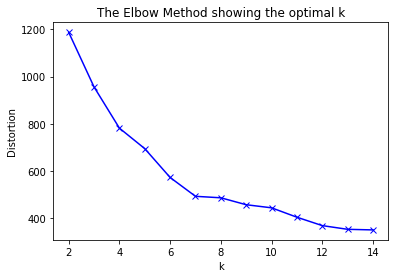

In [22]:
 # clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    labels = kmeanModel.labels_
    print("silhouette %dth score:%d ",k, metrics.silhouette_score(X, labels, metric='euclidean'))
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

print("distortion is ", distortions)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.8413613033706598
For n_clusters = 3 The average silhouette_score is : 0.7602964892930887
For n_clusters = 4 The average silhouette_score is : 0.7019633637869503
For n_clusters = 5 The average silhouette_score is : 0.6766147947749974
For n_clusters = 6 The average silhouette_score is : 0.5956555354898837
For n_clusters = 7 The average silhouette_score is : 0.513449552212723
For n_clusters = 8 The average silhouette_score is : 0.5131758244611339
For n_clusters = 9 The average silhouette_score is : 0.4930541518365341
For n_clusters = 10 The average silhouette_score is : 0.48929824443580056


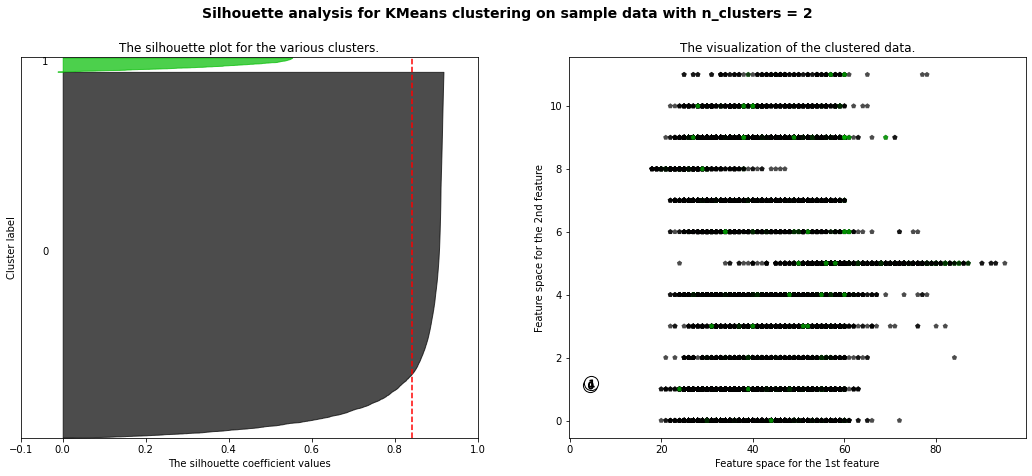

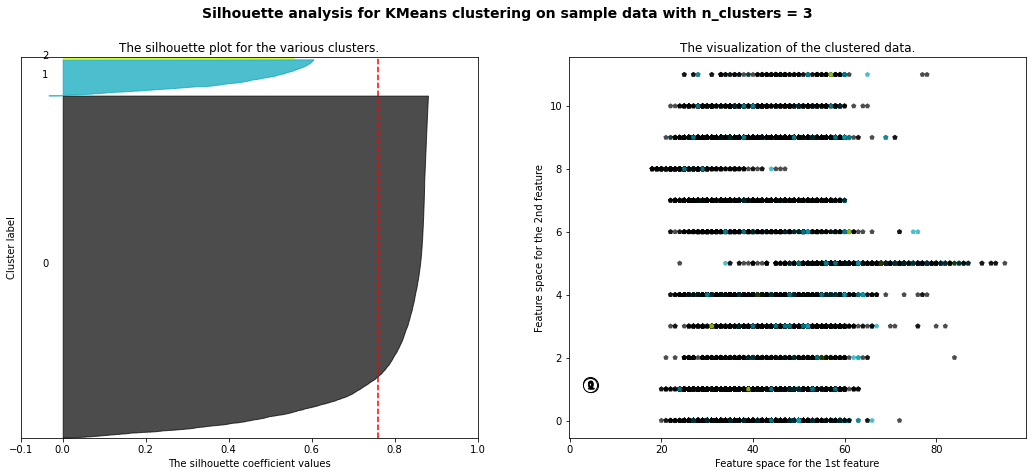

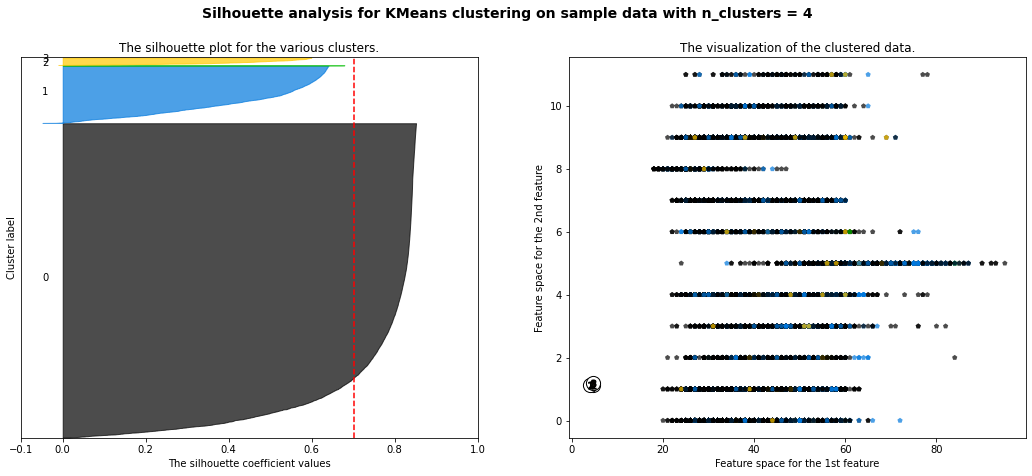

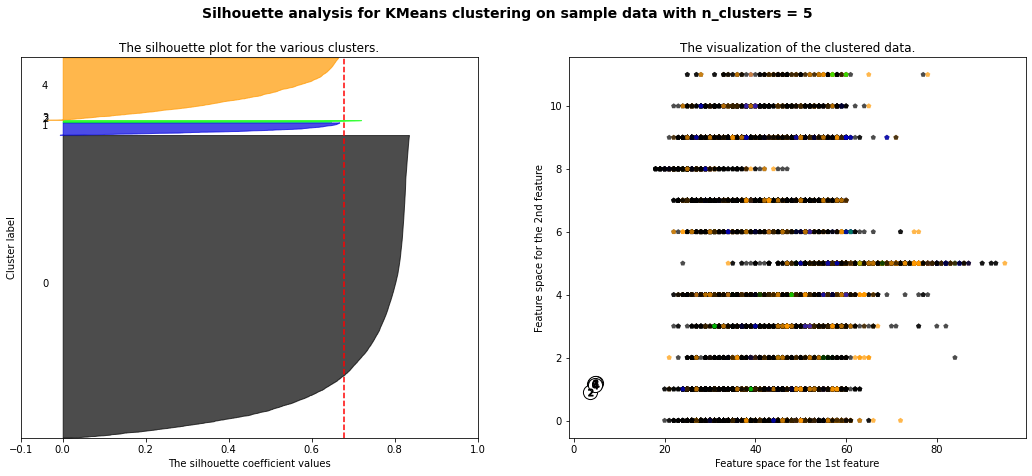

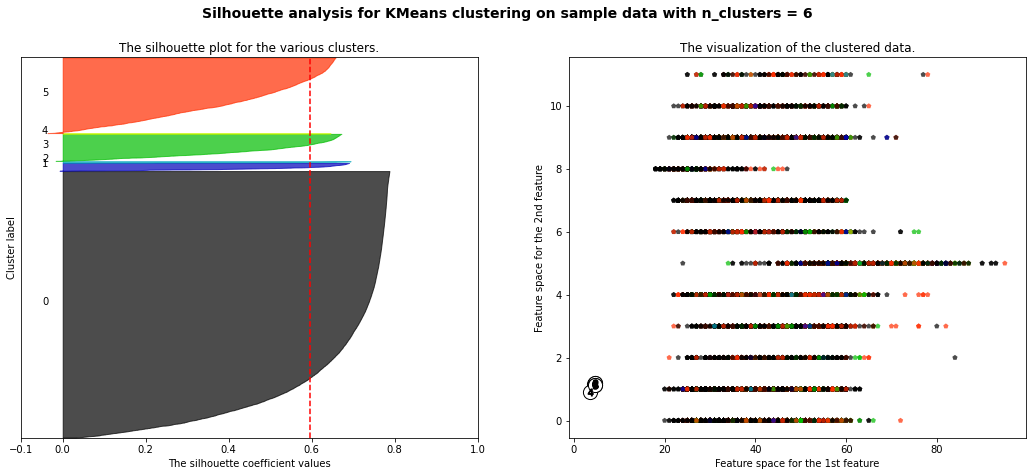

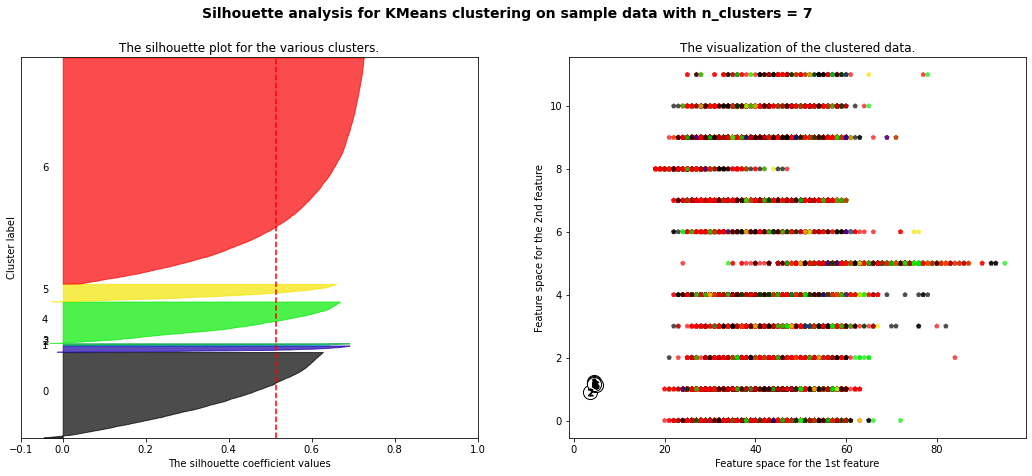

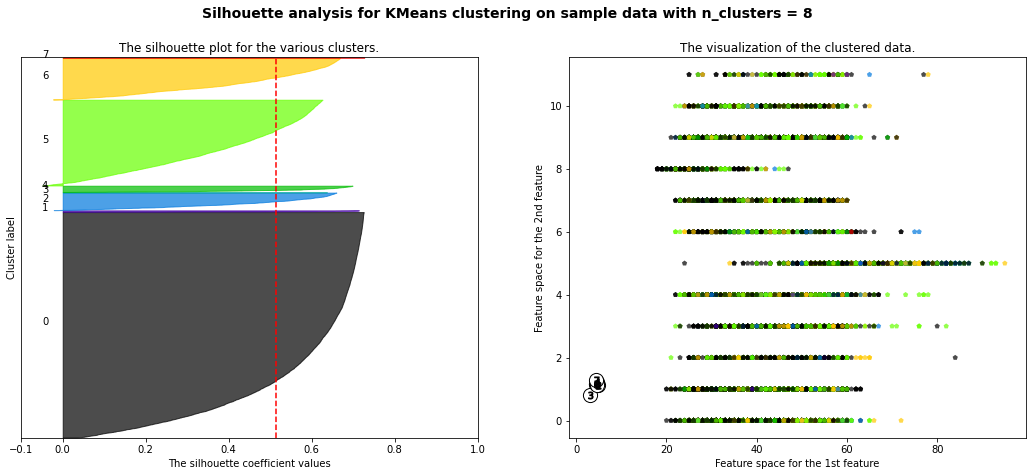

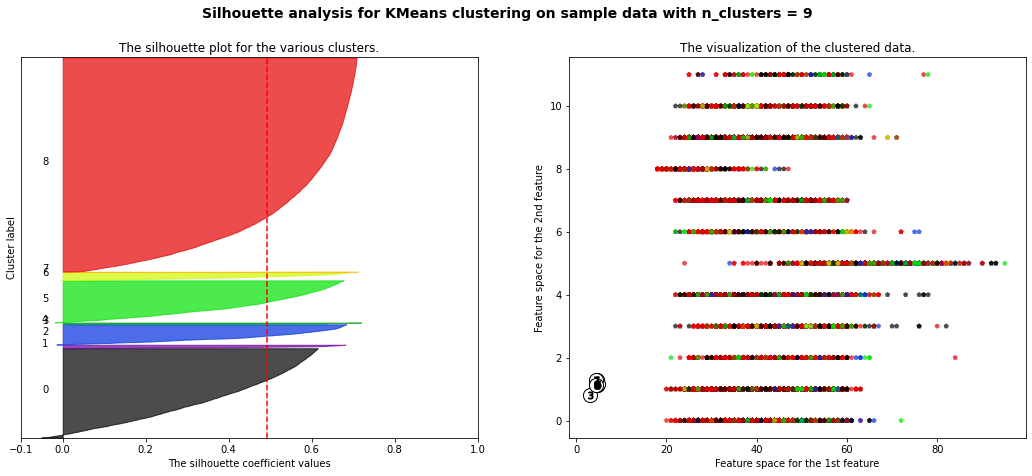

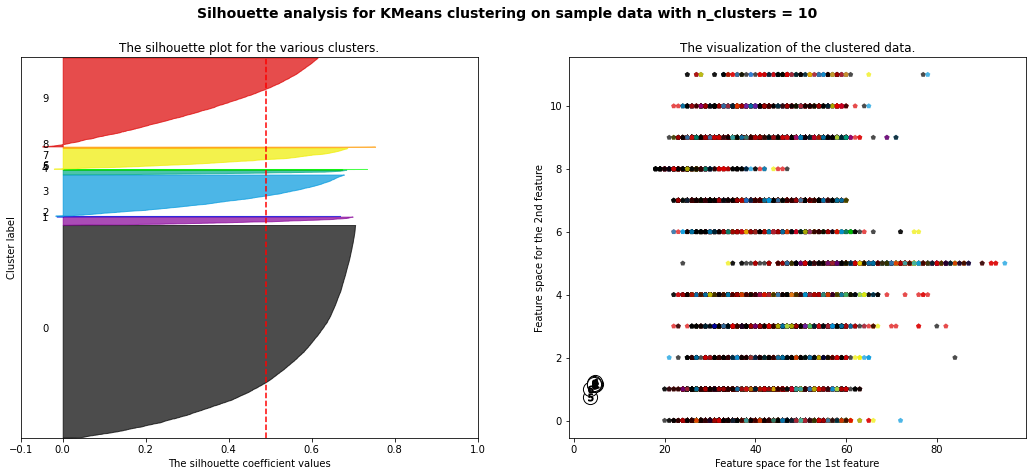

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df3.iloc[:, 0], df3.iloc[:, 1], marker='p', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [0]:

import numpy as np

from numpy.linalg import norm





class Kmeans:

    '''Implementing Kmeans algorithm.'''



    def __init__(self, n_clusters, max_iter=100, random_state=123):

        self.n_clusters = n_clusters

        self.max_iter = max_iter

        self.random_state = random_state



    def initializ_centroids(self, X):

        np.random.RandomState(self.random_state)

        random_idx = np.random.permutation(X.shape[0])

        centroids = X[random_idx[:self.n_clusters]]

        return centroids



    def compute_centroids(self, X, labels):

        centroids = np.zeros((self.n_clusters, X.shape[1]))

        for k in range(self.n_clusters):

            centroids[k, :] = np.mean(X[labels == k, :], axis=0)

        return centroids



    def compute_distance(self, X, centroids):

        distance = np.zeros((X.shape[0], self.n_clusters))

        for k in range(self.n_clusters):

            row_norm = norm(X - centroids[k, :], axis=1)

            distance[:, k] = np.square(row_norm)

        return distance



    def find_closest_cluster(self, distance):

        return np.argmin(distance, axis=1)



    def compute_sse(self, X, labels, centroids):

        distance = np.zeros(X.shape[0])

        for k in range(self.n_clusters):

            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)

        return np.sum(np.square(distance))

    

    def fit(self, X):

        self.centroids = self.initializ_centroids(X)

        for i in range(self.max_iter):

            old_centroids = self.centroids

            distance = self.compute_distance(X, old_centroids)

            self.labels = self.find_closest_cluster(distance)

            self.centroids = self.compute_centroids(X, self.labels)

            if np.all(old_centroids == self.centroids):

                break

        self.error = self.compute_sse(X, self.labels, self.centroids)

    

    def predict(self, X):

        distance = self.compute_distance(X, old_centroids)

        return self.find_closest_cluster(distance)


In [40]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)



# Run local implementation of kmeans

km = Kmeans(n_clusters=7, max_iter=100)

km.fit(X_std)

km.centroids

array([[ 1.23140041e-01,  1.77993593e-01,  2.24282995e-01,
        -1.27145364e-01,  1.20321282e-01, -1.27564474e-01,
        -3.38699516e-01, -5.05983264e-01, -2.21939577e-01,
         3.49272975e-01,  2.74521266e-01, -3.40754023e-01,
         2.34845454e+00,  1.91329373e+00, -2.48558505e+00],
       [ 3.60330941e-02,  1.02109952e-01,  4.87329337e-01,
        -1.47763531e-01,  5.27443271e+00, -3.05198006e-01,
        -3.63771432e-01, -5.71337286e-02, -5.92227960e-02,
        -1.14507030e-01,  8.16415213e-02, -5.65694939e-02,
        -9.83616023e-02, -5.96842178e-02,  5.96788911e-02],
       [-6.20166487e-02, -3.24239640e-02,  5.88040544e-03,
        -1.44010365e-02, -1.21776487e-01,  4.51154515e-01,
        -4.95990312e-01, -4.98764573e-01,  5.79795555e-01,
         2.18781245e-01,  7.50983531e-03, -7.90685752e-02,
        -2.95542981e-01, -2.43208372e-01,  3.13921716e-01],
       [ 2.52071792e-01,  8.61771093e-02,  1.67441687e-01,
        -7.63375538e-02, -2.39099272e-02, -6.42912515